In [1]:
"""

This is a LOGISTIC REGRESSION module.

To use this module:
Command-
   >> import logisticRegression as logr

1. Create an object
   >> stat = logr.optimize( data matrix of ( m examples X n features ) , output matrix of (m examples X 1))
   Output labels can be any number or strings. 

2. Plot graph for selecting a value of alpha, iterations, regularisation parameter, batch size (in case of MINI-BATCH GradDescent))
   >> stat.plotJvsno( alpha , no of iterations , regularisation(default=0 ) , batch size (default = BATCH GradDescent))
   
3. This is a __y = mx + c__ model , so for theta & c
   >> [theta,c] = stat.gettheta( alpha , no of iterations , regularisation(default=0 ) )
   
4. For getting predicted values
   >> y_predict = stat.predict(X_test( m examples X n features ) )
   
5. For checking accuracy
   >> stat.accuracy(X_test,y_test)
   
"""

'\n\nThis is a LOGISTIC REGRESSION module.\n\nTo use this module:\nCommand-\n   >> import logisticRegression as logr\n\n1. Create an object\n   >> stat = logr.optimize( data matrix of ( m examples X n features ) , output matrix of (m examples X 1))\n   Output labels can be any number or strings. \n\n2. Plot graph for selecting a value of alpha, iterations, regularisation parameter, batch size (in case of MINI-BATCH GradDescent))\n   >> stat.plotJvsno( alpha , no of iterations , regularisation(default=0 ) , batch size (default = BATCH GradDescent))\n   \n3. This is a __y = mx + c__ model , so for theta & c\n   >> [theta,c] = stat.gettheta( alpha , no of iterations , regularisation(default=0 ) )\n   \n4. For getting predicted values\n   >> y_predict = stat.predict(X_test( m examples X n features ) )\n   \n5. For checking accuracy\n   >> stat.accuracy(X_test,y_test)\n   \n'

In [2]:
    #  EXAMPLE  --

In [6]:
import numpy as np
import logisticRegression as logr
import pandas as pd

c:\Users\91983\Desktop\ml_library\logisticRegression\logisticRegression.py:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if int(np.shape(self.X)[0]%batsize) is 0:


In [7]:
# loading data


file_data = pd.read_csv('LogisticRegressionData1.txt',header=None)
X_data = np.array(file_data.values)

In [8]:
X = X_data[:,0:np.shape(X_data)[1]-1]
y = X_data[:,np.shape(X_data)[1]-1]

In [9]:
[m,n] = np.shape(X)

In [10]:
#splitting data into test and train set

X_train = X[0:int(0.8*m),:]
y_train = y[0:int(0.8*m)]
X_test = X[int(0.8*m):,:]
y_test = y[int(0.8*m):]


y_test = np.reshape(y_test,(np.shape(y_test)[0],1))
y_train = np.reshape(y_train,(np.shape(y_train)[0],1))


In [11]:
# using logistic regression

stat = logr.optimize(X_train,y_train)

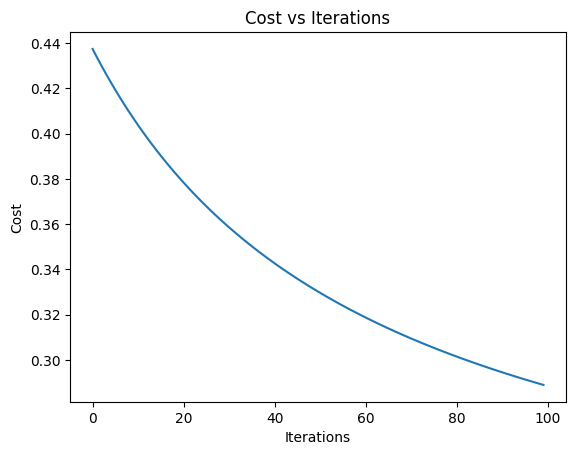

In [12]:
# trying values of alpha by plotting cost vs iteration graph ( parameters (alpha,no of iterations) ,regularisation(default=0) ...for batch gradient descent

stat.plotJvsno(0.1,100)

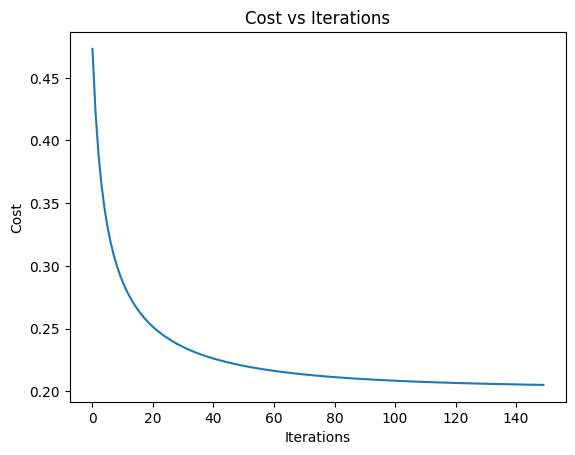

In [13]:
stat.plotJvsno(1,150)

In [14]:
# (1,150) seems to be suitable here, for the optimum theta... parameters: (alpha,no of iterations,regularisation_(default=0), graddes batch_size_(default=0) ) 

[theta,c] = stat.gettheta(1,200,2)

In [17]:
# computing accuracy with test set

k = stat.accuracy(X_test,y_test)
print(k)

85.0


In [18]:
# for optimizing using mini=batch gradient descent...parameters: (alpha,no of iterations,regularisation_(default=0), graddes batch_size_(default=0) )
[theta,c]= stat.gettheta(1,200,1,20)

In [20]:
# Checking accuracy

k = stat.accuracy(X_test,y_test)
print( k )

85.0


In [22]:
# Comparing accuracy with sklearn

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train.ravel())
y_ = model.predict(X_test)
y_ = y_.reshape((np.shape(y_test)[0],1))
equ = np.equal(y_,y_test)
n_correct = np.sum(equ.astype(int))
accuracy = np.true_divide(n_correct*100,np.shape(y_test)[0])
print (accuracy,'%')

90.0 %
